# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [1]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10_Datacademy/week_two/studentsperformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

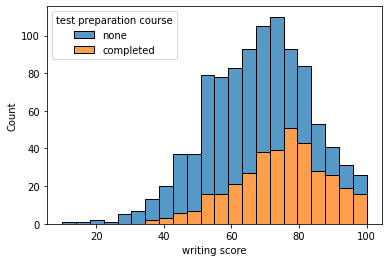

In [15]:
# hue='col', separa los datos en el histograma según la columnda del dataframe seleccionada
# multiple='stack' se usa para que no los encime sino a manera visual se divida
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

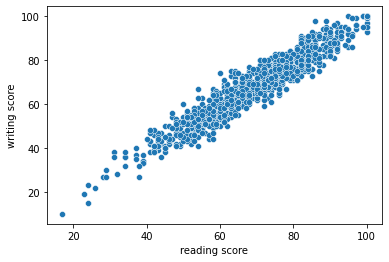

In [18]:
#sns.scatterplt gráfico de disperción
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

In [23]:
freq = df['writing score'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
#renombrando columnas del df de frecuencias
df_freq = df_freq.rename(columns={'index': 'writing score', 'writing score': 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [24]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [25]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [35]:
X = df['reading score'].values
Y = df['writing score'].values

# Los datos de entrada debe ser un formato que no sea lista y se usa la forma de tensor
x = X.reshape(-1,1)
y = Y.reshape(-1,1) 


from sklearn.model_selection import train_test_split
# train_test_split devuelve 4 set de datos, los de entrenamiento y los de prueba para cada set
# el test_size indica que el 20% de los datos pasados de los set de X y Y son para prueba y el 80% de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2)

In [39]:
#Regresión Lineal
from sklearn.linear_model import LinearRegression
# se crea un onjeto para realizar la Regresión Lineal
reg = LinearRegression()

# se entrena la regresión con los datos de entrenamiento de x y Y
reg.fit(X_train, Y_train)

#
print('La pendiente es:', reg.coef_)
print('El Bias es:', reg.intercept_)
print('El coeficiente de regresión es: ', reg.score(X_train, Y_train))


La pendiente es: [0.99502854]
El Bias es: -0.8495311674986255
El coeficiente de regresión es:  0.9145183472862777


## Visualización de nuestro modelo entrenado

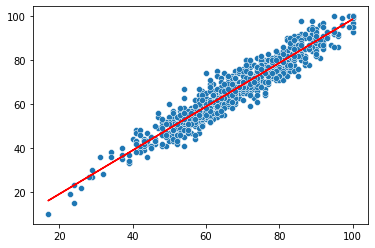

In [42]:
# Volviendo los datos de X_train a un arreglo
x_flat = X_train.flatten()

# generando predicción de y (y⌃) con los datos de entrenamiento de X
y_hat = reg.predict(X_train)

#graficar linea de predicción dentro de la grafica
fig, ax = plt.subplots()
# Graficando son seaborn y plt.plot
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train, y_hat, color='r')

## Evaluación de nuestro modelo

In [46]:
# Se usa el Error cuadratico medio MSE
from sklearn.metrics import mean_squared_error

#Realizar la predicciones con los datos de prueba
y_pred = reg.predict(X_test)

# Calcula el MSE - Mean Square Error - Que distante está la predicción de los datos de test
print(mean_squared_error(Y_test, y_pred))

23.186817267108108


In [47]:
# creando un dataframe para revisar los valores de test y los de predicción
values = pd.DataFrame({'Actual test': Y_test.flatten(), 'Predict': y_pred.flatten()})
values

,Actual test,Predict
0,78,81.737837
1,68,60.842238
2,99,94.673208
3,64,65.817381
4,48,52.882010
...,...,...
195,50,60.842238
196,49,47.906867
197,62,57.857152
198,75,76.762695
